### Import Necessary Libraries and Loading the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings("ignore")

In [4]:
df= pd.read_csv('netflix_dataset.csv')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


### Basic Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### In this dataset we have 11 Categorical Columns and 1 Numerical Column.
#### Description of each columns:
-----
>1. **Show id**
>2. **Type identifier**: Movie or Tv Show
>3. **Titles**: Title of the COntent
>4. **Directors**: Directors name
>5. **Cast**: Actors Name
>6. **Country**: Where the Movie or Tv Show was produced
>7. **date_added**: Date it was added on Netflix
>8. **release_year**: Actual Release year of the Content
>9. **Rating**: The maturity level of shows and movies
>10. **Duration**:  In minutes or number of seasons
>11. **Description**: The short summary or blurb provided for each show or movie.

**date_added** column dtype is incorrect

In [8]:
df.shape

(8807, 12)

> Observation: So we have total 8807 rows or entries and Total of 12 Columns

### Basic Summary Statistics 

In [11]:
df.describe().T # To transpose the data

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


**Observations**: 

---
After analysing the numerical column i.e **'release_year'**:
> 1. We have content that has been the released year **1925 to 2021**.
> 2. We have the mean year 2014
> 3. We have a standard deviation of ~ 8.82 and this can show us that around 68% of the data likely falls between: 2014.18 ± 8.82 =(2005.36 to 2023) we have release_year data spreads from 1925 to 2021, probably we have outliers mostly before 2004. Because our lower bound is 2004.

    IQR (Interquartile Range) = Q3 - Q1 = 2019 - 2013 = 6
    Outlier boundaries:
    Lower bound = Q1 - 1.5 * IQR = 2013 - 9 = 2004
    Upper bound = Q3 + 1.5 * IQR = 2019 + 9 = 2028
    So, any release year before 2004 or after 2028 would be considered an outlier.

### Data Cleaning

---
>1. Null Value Analysis
2. Checking Dublicate Values
3. Handling inconsistent or incorrect data

#### 1. Null Values analysis: 

In [15]:
# Is there any null value in dataset
df.isnull().values.any()

True

> **Observation**: Yes, we have null values in the dataset. 

##### Q. But which columns and how many null values??

In [18]:
for i in df.columns:
    null_rate= df[i].isnull().sum()/len(df) *100
    if null_rate>0:
        print (f'{i} Null rate is: {null_rate: .2f}%')

director Null rate is:  29.91%
cast Null rate is:  9.37%
country Null rate is:  9.44%
date_added Null rate is:  0.11%
rating Null rate is:  0.05%
duration Null rate is:  0.03%


##### **Observations**:
---
>1. Now we have more knowledge for missing values.
>2. These features are categorical types, for this reason, so it might be a good idea to fill these values with 'missing' data.

In [20]:
# Filling Missing Data:
df= df.fillna(value= {'director': 'Unknown', 
                  'cast': 'No Data', 
                  'date_added': 'missing', 
                  'rating': 'missing', 
                  'duration': 'missing', 
                  'country': 'missing'})


In [21]:
# Rechecking Null Values again:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

> **So, Null Values are elimated now**.

#### 2. Checking Dublicate Values

In [24]:
a= df.duplicated().sum()
print(f'Dublicates value number in dataset: {a}')


Dublicates value number in dataset: 0


#### 3. Handling incorrect data

##### For Rating:

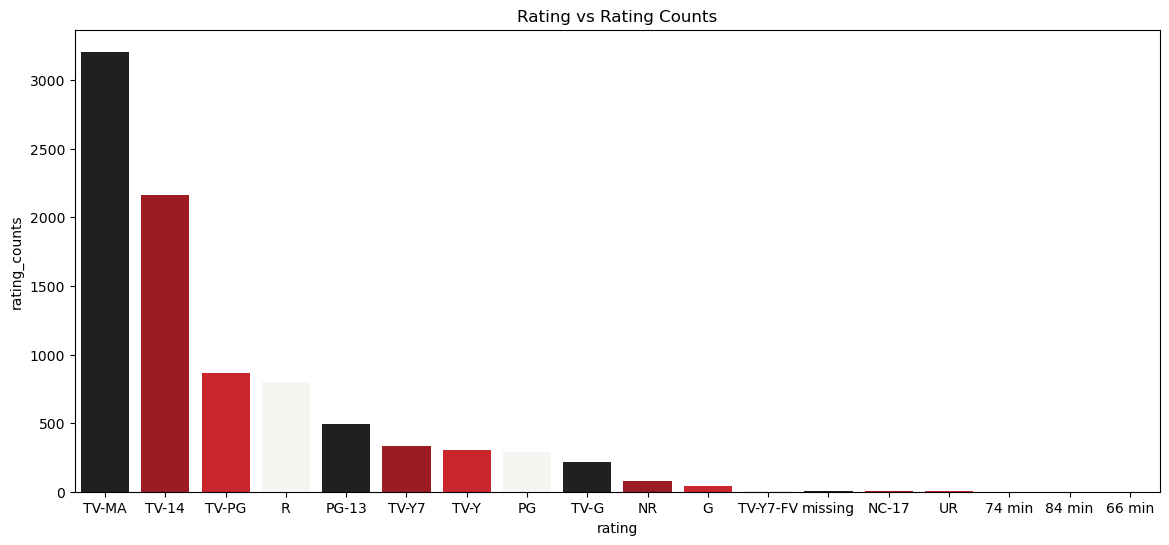

In [27]:
colors = [ '#221f1f', '#b20710', '#e50914','#f5f5f1']

## check incorrect data 
rating_counts= df['rating'].value_counts().reset_index()
rating_counts.columns= ['rating','rating_counts']
plt.figure(figsize=(14,6))
sns.barplot(data= rating_counts, x='rating' ,y='rating_counts', palette= colors)
plt.title('Rating vs Rating Counts')
plt.show()

**Obesrvations**:

---
>1. Some Unusual values obeserved afte doing the frequency check for **rating** column. That is: '74 min','84 min','66 min'
>2. Convert them as **UR: Unrated**

In [29]:
## convert unusual values to UR: 
df['rating']= df['rating'].replace({'74 min': 'UR',
                                   '84 min': 'UR',
                                   '66 min': 'UR'})

> So, We eliminated sneaky values in ratings.

##### For Release_year: 

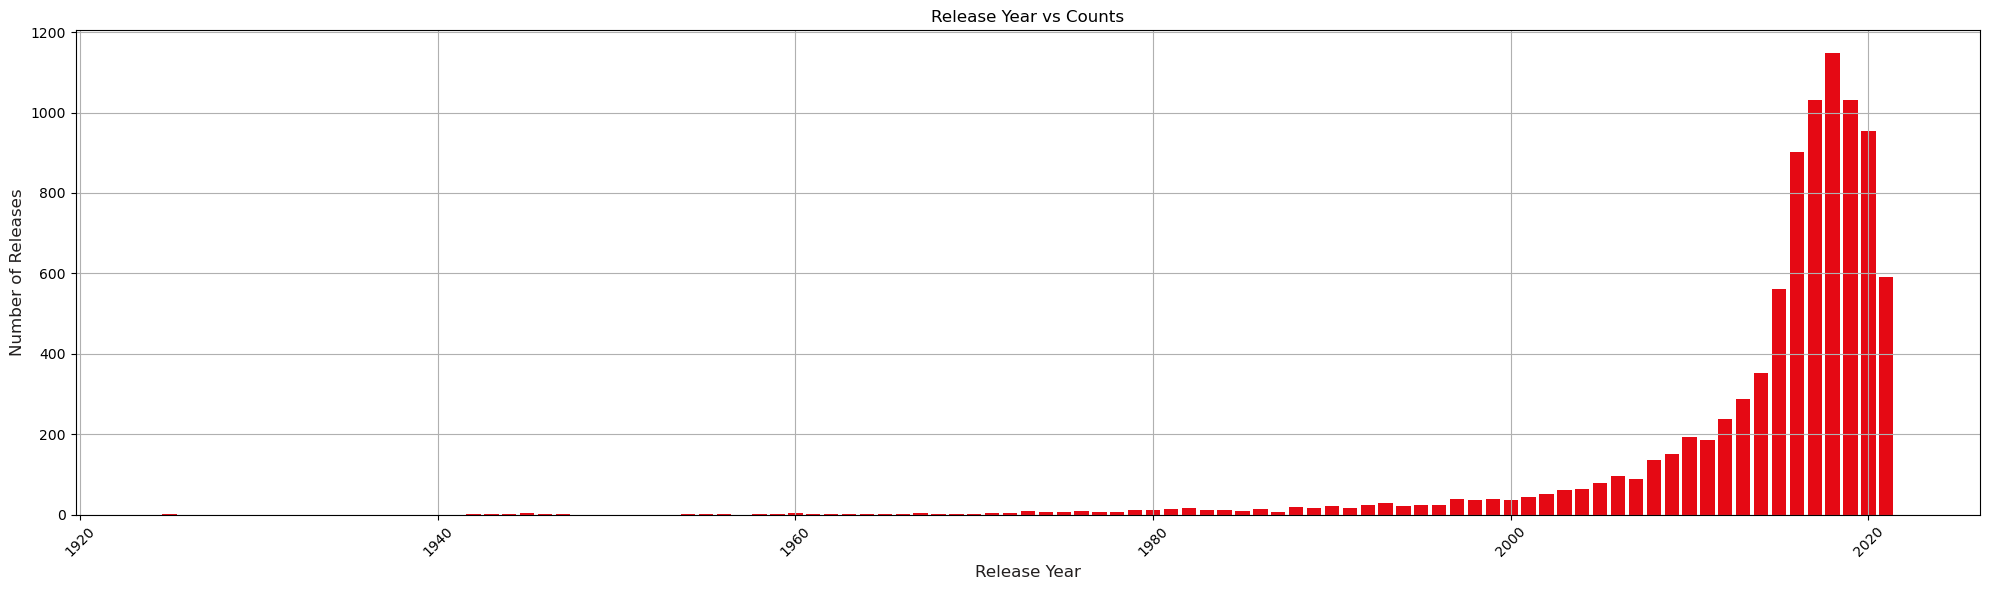

In [32]:
bar_color = '#e50914' 
text_color= '#221f1f'

## Checking same for released Year
Year_counts= df['release_year'].value_counts().reset_index()
Year_counts.columns= ['release_year','release_year_counts']
plt.figure(figsize=(20,6))
plt.bar(Year_counts['release_year'], Year_counts['release_year_counts'], color=bar_color)
plt.title('Release Year vs Counts')
plt.xlabel('Release Year', fontsize=12, color=text_color)
plt.ylabel('Number of Releases', fontsize=12, color=text_color)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

> **It seems like all of the data in release_year correct format**.

### Exploratory Data Analysis.

### **1. Overall Content Type**:

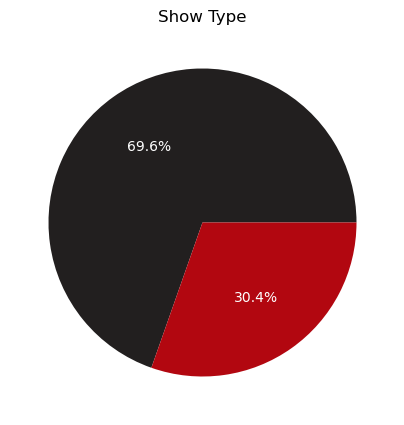

In [36]:
show_type_count= df['type'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(show_type_count, labels= show_type_count.index, autopct= '%1.1f%%',colors=['#221f1f', '#b20710'],textprops={'color':"white"})
plt.title('Show Type')
plt.show()

**Observations**

---
> We can see, Most of the content tends towards movies with 69.6% and rest TV Shows 30.4%.

### **2. Region wise content total content**: 

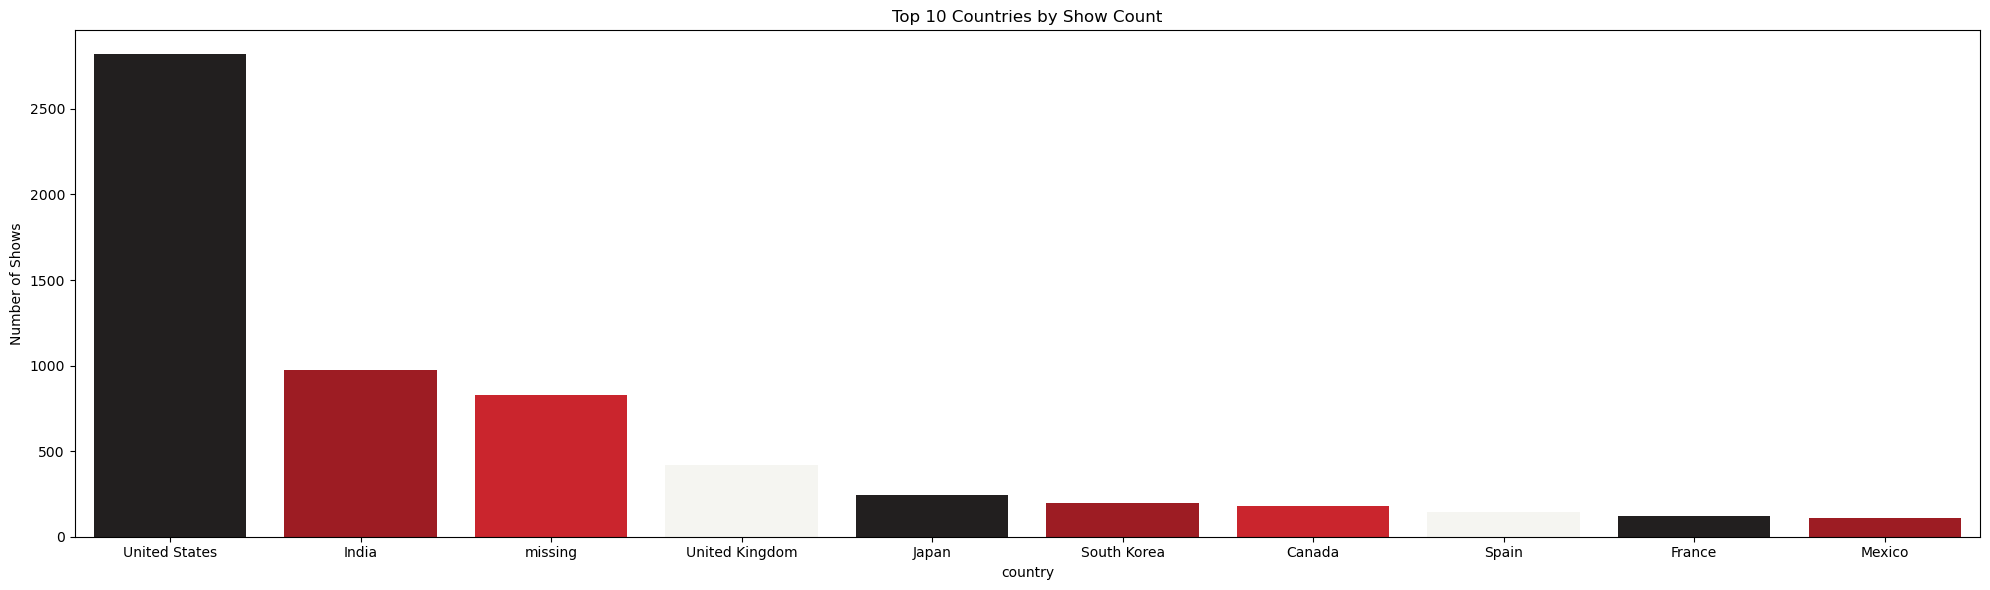

In [39]:
country_counts = df['country'].value_counts().head(10).reset_index()
country_counts.columns = ['country', 'count']

plt.figure(figsize=(20,6))
colors = ['#221f1f', '#b20710', '#e50914','#f5f5f1'] 
sns.barplot(data= country_counts, x='country', y='count', palette=colors)
plt.title('Top 10 Countries by Show Count')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.show()

##### Insights:

---
>**United States** being at top on the list followed by **India and UK**. It makes sense, after all **NETFLIX** is **US- based company** and the majority of its original content is produced and distributed from the United States.

### **3. Region wise content preferences**: 

In [42]:
# Top 10 Region is selected:

per_region_show_type = df.groupby(['country','type'])['type'].count().unstack()
sort_per_region_show_type= per_region_show_type.sum(axis=1).sort_values(ascending=False).head(10)
stacked_Show_type = per_region_show_type.loc[sort_per_region_show_type.index]
stacked_percent = stacked_Show_type.div(stacked_Show_type.sum(axis=1), axis=0) * 100

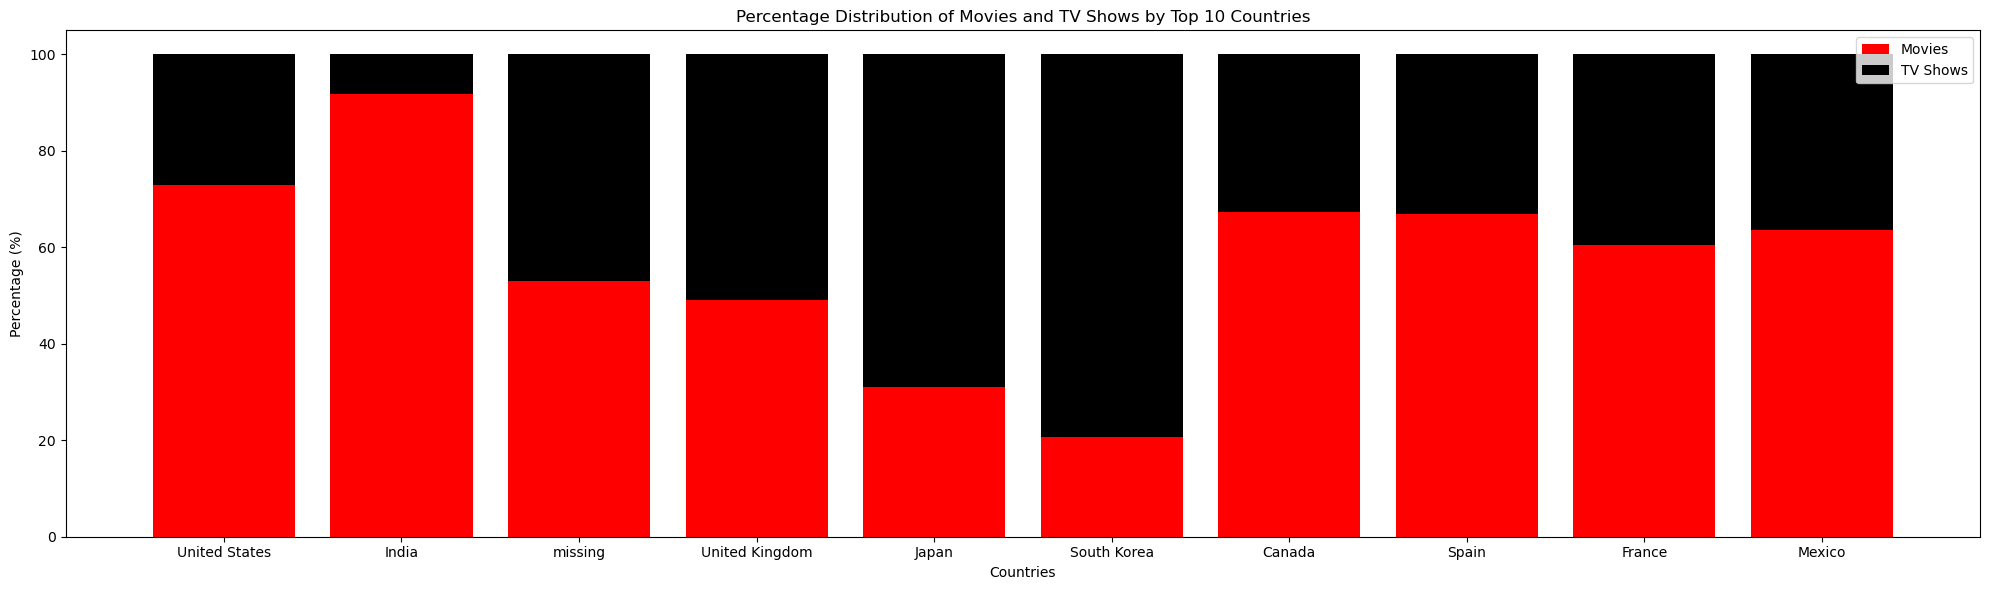

In [43]:
plt.figure(figsize=(20, 6))
plt.bar(stacked_percent.index, stacked_percent['Movie'], label='Movies', color='red')
plt.bar(stacked_percent.index, stacked_percent['TV Show'], bottom=stacked_percent['Movie'], label='TV Shows', color='black')
plt.xlabel('Countries')
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution of Movies and TV Shows by Top 10 Countries')
plt.legend()
plt.tight_layout()
plt.show()

##### **Insights**: 

---
>**India, focus on Movies.**
**Bollywood** is a strong film industry, producing hundreds of movies annually, making them readily available for licensing or streaming. Movies are popular across all age groups in India. When Netflix entered the Indian market, it focused on acquiring a large volume of local films to quickly build a catalog that appeals to the mass audience.
Therefore, **NETFLIX INDIA** is predominantly focused on movies.


>**Japan and South Korea, focus on TV Shows.**
In contrast, **Japan and South Korea** produce content like **Anime and K-Dramas**, which enjoy **Global Demand**. Because of this international appeal, Netflix has heavily invested in **Original TV series** in these regions to meet the demand for unique, binge-worthy content.
This is part of Netflix’s strategic approach to use Korea and Japan as content exporters, creating shows that are not only for local audiences but also for international streaming.

### 4. **Rating Count**:

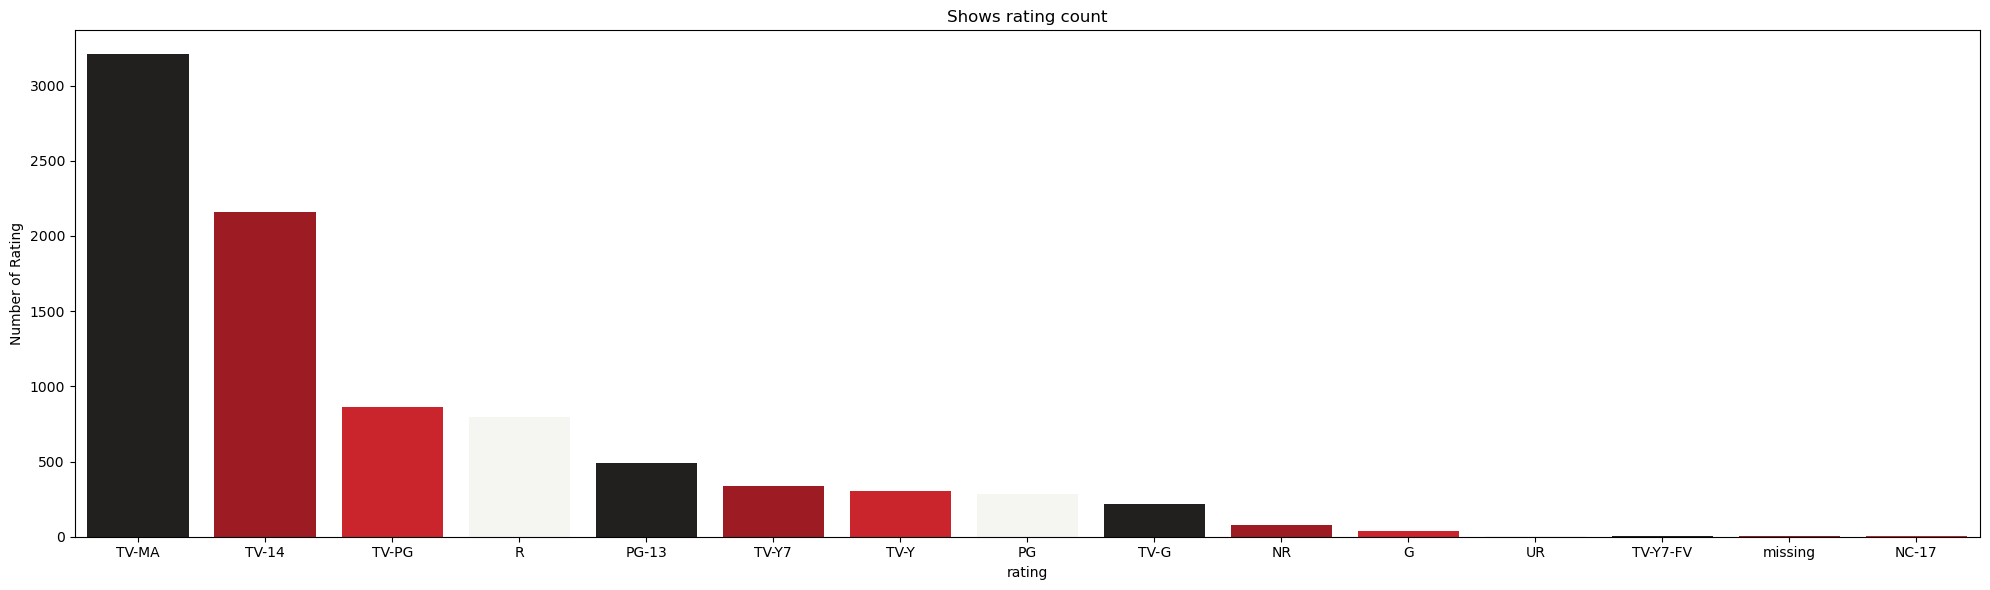

In [46]:
rating_count= df['rating'].value_counts().reset_index()
rating_count.columns = ['rating', 'count']

plt.figure(figsize=(20,6))
colors = ['#221f1f', '#b20710', '#e50914','#f5f5f1'] 
sns.barplot(data=rating_count, x='rating', y='count', palette=colors)
plt.title('Shows rating count')
plt.ylabel('Number of Rating')
plt.tight_layout()
plt.show()

##### **Observations**:
---
>1. Most used ratings TV-MA, TV-14, TV-PG is used in tv-shows . That means shows mostly for Mature or 14+.
>2. R rating in fourth place in movies. That means Movies in Netflix mostly for Mature.

**We can say Netflix better place for adult, and mature content.**

### **5. Content Age Group Distribution Across Countries**
> Does Netflix uniformly target certain demographics? Or does this vary by country?

In [49]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids', 'missing'], dtype=object)

In [50]:
heatmap_age_country= df.groupby(['country','target_ages'])['target_ages'].count().reset_index(name='count')
sort_countries= heatmap_age_country.sort_values(by='count',ascending=False)

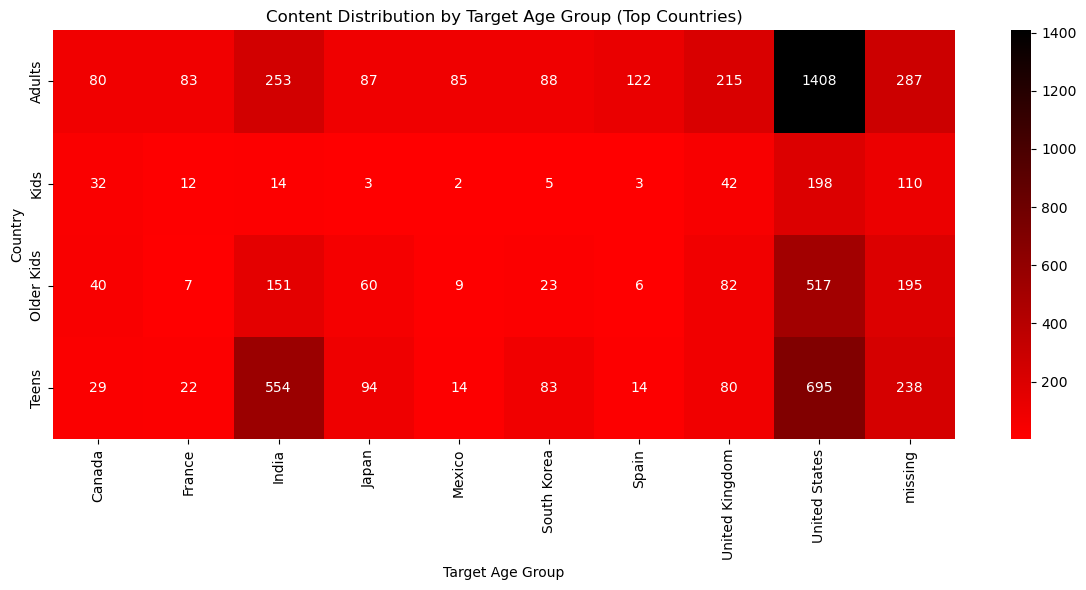

In [51]:
age_filter = ['Teens', 'Adults', 'Older Kids', 'Kids']
filtered_df = df[df['target_ages'].isin(age_filter)]

top_countries = filtered_df['country'].value_counts().head(10).index
filtered_df = filtered_df[filtered_df['country'].isin(top_countries)]

# Create a pivot table: rows = countries, columns = target_ages, values = count
heatmap_data = filtered_df.pivot_table(columns='country', index='target_ages', values='show_id', aggfunc='count')
netflix_cmap = LinearSegmentedColormap.from_list("NETFLIX", ['red', 'black'])

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap=netflix_cmap)
plt.title('Content Distribution by Target Age Group (Top Countries)')
plt.xlabel('Target Age Group')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

##### **Observations**: Here we see interesting differences between countries.

---
> 1. Most shows in **India** are targeted to teens.
> 2. For **USA and UK** most shows are for adults. It is also interesting to note similarities between culturally similar countries - the US & UK are closey aligned with their Netflix target ages,

#### **As for USA is at top and India is at 2nd. Lets see now for USA and INDIA - Netflix Content Trends Over the Years**

### **6. Content trend analysis: USA vs INDIA**

In [55]:
# Correcting Dtype for 'date_added' and selecting content only for INDIA & USA

df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
countries = ['India', 'United States']
filtered_country= df[df['country'].isin(countries)]

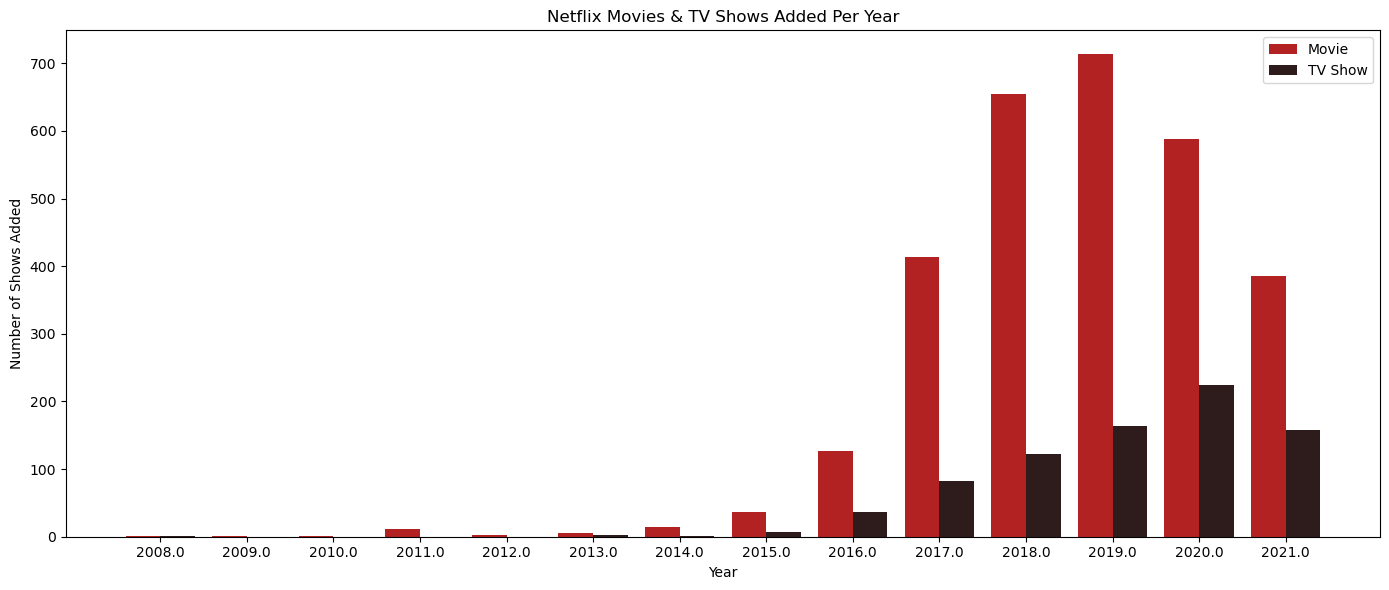

In [56]:
# Extract Only Year from 'date_added'

filtered_country['year_added'] = filtered_country['date_added'].dt.year
filtered_country = filtered_country[filtered_country['year_added'].notna()]

# Group by year and type
yearly_counts = filtered_country.groupby(['year_added', 'type'])['show_id'].count().unstack(fill_value=0)

# Bar chart setup
years = yearly_counts.index
movies = yearly_counts['Movie']
tv_shows = yearly_counts['TV Show']
x = np.arange(len(years))  # the label locations
width = 0.4  # the width of the bars

# Plot the bars
plt.figure(figsize=(14, 6))
plt.bar(x - width/2, movies, width, label='Movie', color='#b22222')
plt.bar(x + width/2, tv_shows, width, label='TV Show', color='#2e1c1c')

# Labels and legends
plt.xlabel('Year')
plt.ylabel('Number of Shows Added')
plt.title('Netflix Movies & TV Shows Added Per Year')
plt.xticks(x, years)
plt.legend()
plt.tight_layout()
plt.show()

#### **Insights: Netflix Content Trends Over the Years**

- Being as US Based company NETFLIX was dominated in USA. Slow and Rapid increment of content over the years has observed in USA. As for India, NETFLIX was introduced in INdian Market in 2016 and become the 2nd largest among all countries.

---
>Starting from 2017, there is a noticeable increase in the number of Movies and TV Shows added to the Netflix platform. This aligns with Netflix's global expansion strategy, where the content became available in over several countries by early 2016 like India, leading to more regional and diverse content being produced.


>From 2018 onward, there's a steady rise in the number of TV Shows, indicating a shift in viewer preferences. TV shows offer longer engagement and binge-worthy experiences.


>There is a spike in content during the COVID-19 pandemic years. As theaters were closed and people stayed indoors, streaming became the primary mode of entertainment. Netflix likely increased its content library (especially TV shows) to meet rising demand and changing viewer habits.

### **7. Genre Analysis**

In [59]:
df['listed_in'].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

#### Top Genres:

                      index  count
0      International Movies   2752
1                    Dramas   2427
2                  Comedies   1674
3    International TV Shows   1351
4             Documentaries    869
5        Action & Adventure    859
6                 TV Dramas    763
7        Independent Movies    756
8  Children & Family Movies    641
9           Romantic Movies    616


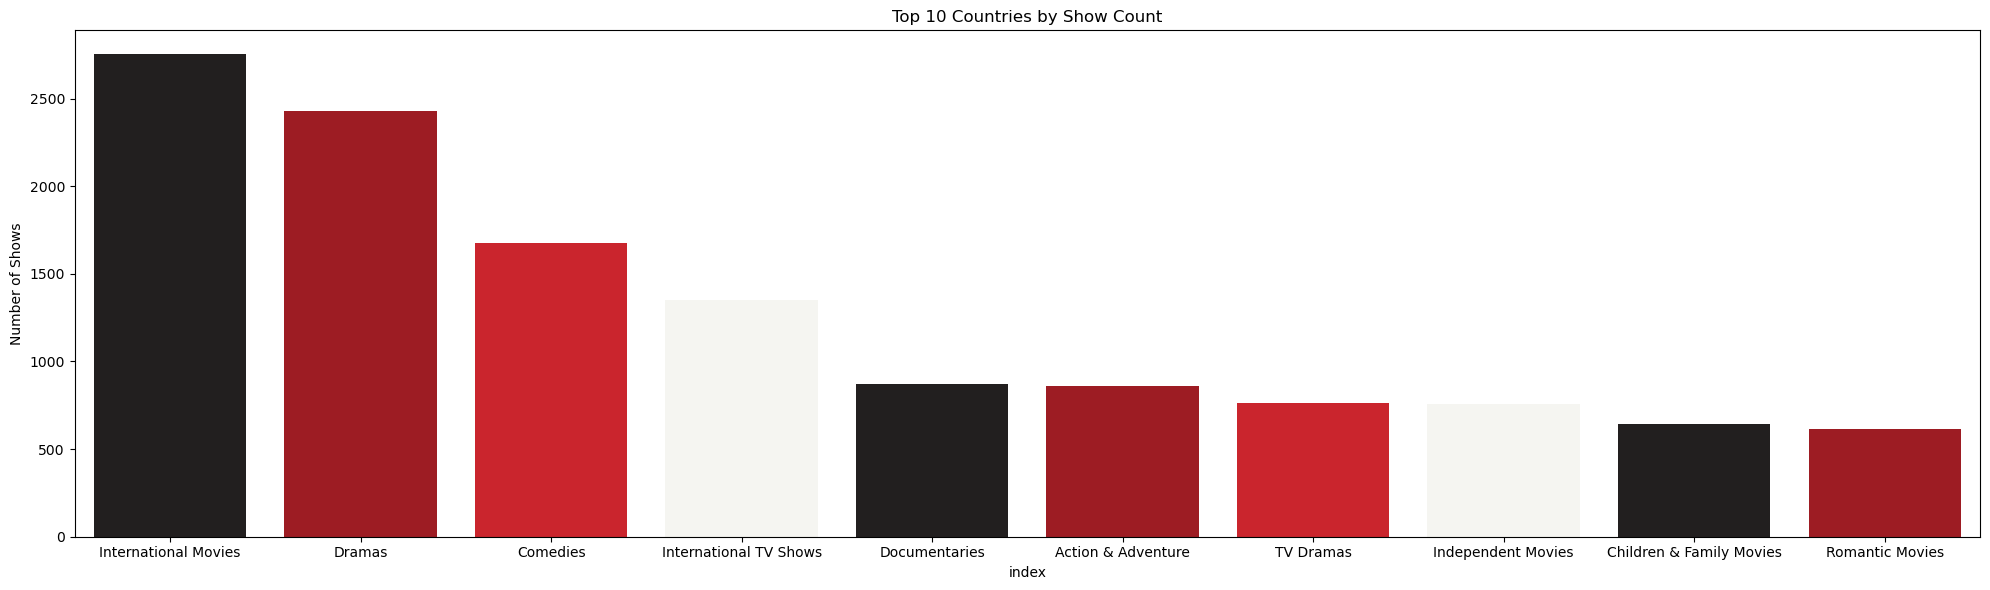

In [61]:
all_genre = df["listed_in"].str.split(",")
genre_counts = pd.Series([tag.strip() for genre in all_genre for tag in genre]).value_counts()
top_10_genre = genre_counts.head(10).reset_index()
print(top_10_genre)

colors = [ '#221f1f', '#b20710', '#e50914','#f5f5f1']

plt.figure(figsize=(20,6))
sns.barplot(data= top_10_genre, x='index', y='count', palette=colors)
plt.title('Top 10 Countries by Show Count')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.show()

##### **Observations**:

---
>Most Content in Netflix;
>>1. International Movies, Dramas and Comedies.
>>2. There is international Movies and Tv shows in top five, and I think this is good for Netflix. We can say, Netflix has users around the world.
>>3. If we look just regular genres; Drama is first. Because drama mostly related almost every other genre. There's not a lot movies or TV Shows pure Drama.
>>4. Other Coming genre is Comedies, and this is I think it's obvious, because Comedy transcends age, language, and culture- making it a go-to genre for both casual and frequent viewers.

##### Genre Correlation:

In [64]:
df_genre = df[['show_id', 'listed_in']].copy()
df_genre['genre'] = df_genre['listed_in'].str.split(',')
df_genre = df_genre.explode('genre')
df_genre['genre'] = df_genre['genre'].str.strip()

In [65]:
genre_matrix = pd.crosstab(df_genre['show_id'], df_genre['genre'])
genre_corr = genre_matrix.corr()

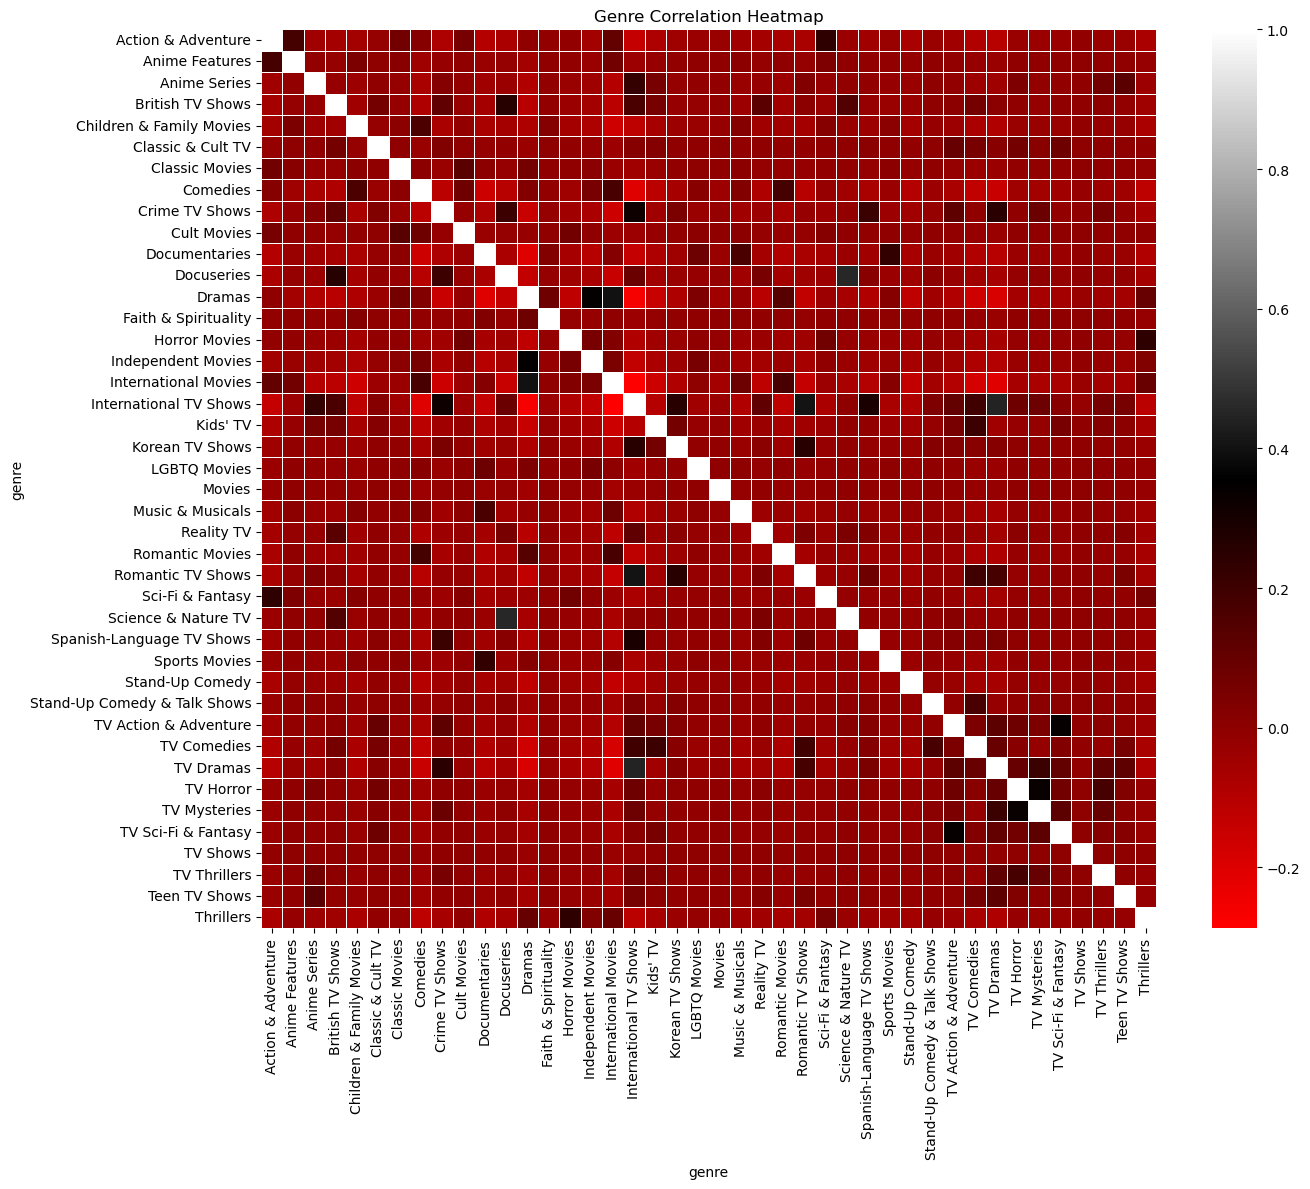

In [66]:
red_black_cmap = LinearSegmentedColormap.from_list("RedBlack", ['red', 'black','white'])

plt.figure(figsize=(14, 12))
sns.heatmap(genre_corr, cmap=red_black_cmap, linewidths=0.5, annot=False)
plt.title('Genre Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### **Insights**: Some Top Correlations between Genres

---                  
>1. Docuseries: Science & Nature TV
>2. Dramas: International Movies,Independent Movies,TV Comedies, TV Comedies 
>3. International TV Shows: TV Dramas, Romantic TV Shows, Anime Features                     
>4. Crime TV Shows: International TV Shows                          
>5. TV Horror: TV Mysteries                 
>6. TV Action & Adventure: TV Sci-Fi & Fantasy                             
>7. Korean TV Shows: Romantic TV Shows, International TV Shows            
>8. Comedies: International Movies                          
>9. Action & Adventure: Anime Features               

### 8. Time Analysis

##### Content Release Year: 

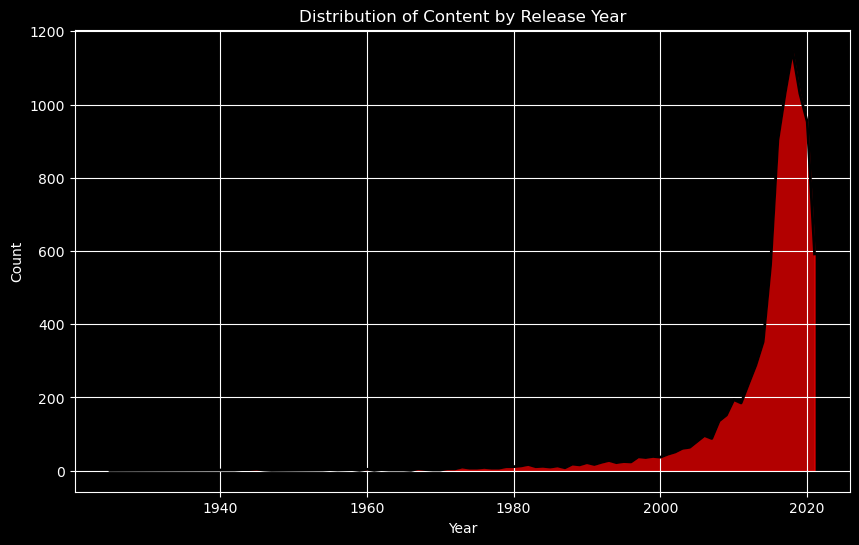

In [70]:
year_counts = df['release_year'].value_counts().sort_index()

plt.style.use('dark_background')
# Create area chart
plt.figure(figsize=(10, 6))
plt.fill_between(year_counts.index, year_counts.values, color='red', alpha=0.7)
plt.plot(year_counts.index, year_counts.values, color='black', linewidth=2)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Content by Release Year')
plt.grid(True)
plt.show()

>1. **Most content released around 2017 to 2019**
>2. After 2010, we can see that movies or series are more concentrated.

#### Check Release date vs Content added

In [73]:
df['extract_year']= df['date_added'].dt.year.astype('Int64')
df['extract_month']= df['date_added'].dt.month.astype('Int64')

In [74]:
release_counts = df.groupby(['extract_year', 'extract_month']).size().unstack().fillna(0)

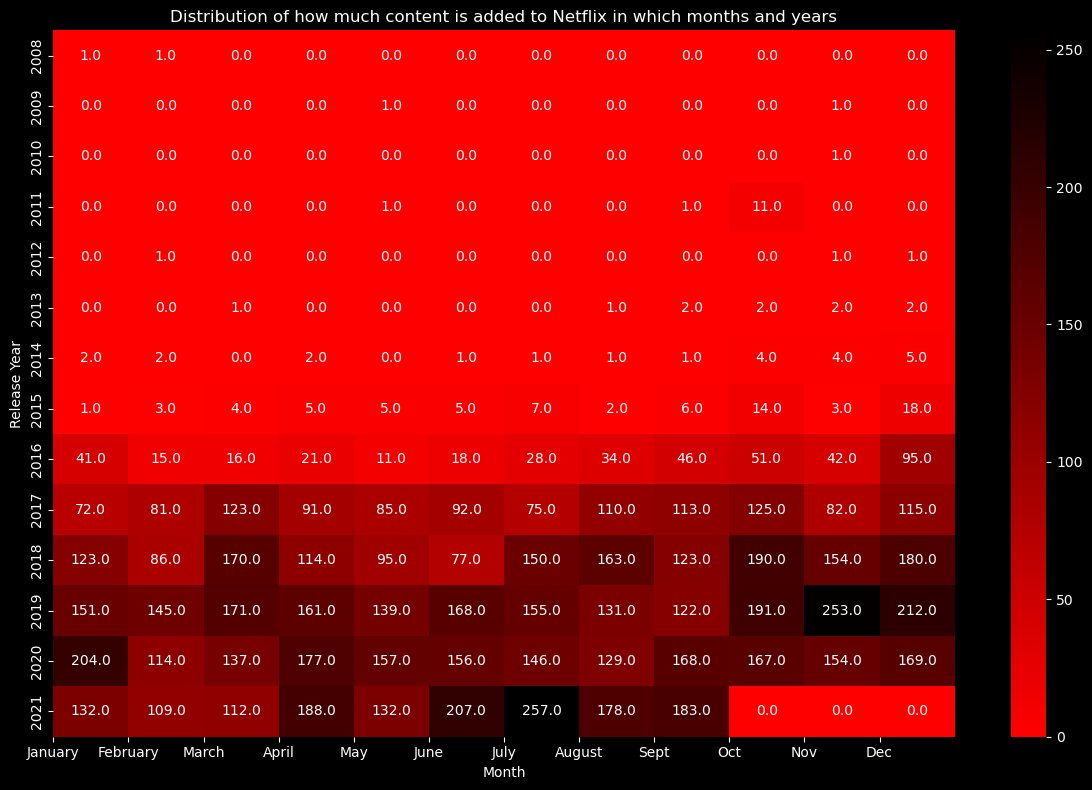

In [75]:
red_black_cmap = LinearSegmentedColormap.from_list("RedBlack", ['red', 'black'])

plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(release_counts, cmap=red_black_cmap, annot=True, fmt=".1f")
plt.xlabel('Month')
plt.ylabel('Release Year')
plt.title('Distribution of how much content is added to Netflix in which months and years')

# Customize x-axis tick labels to show month names
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                'August', 'Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(0, 12), labels=month_labels)

plt.tight_layout()
plt.show()

##### **Observations**
---
>There are differences between the release dates of the content and the dates it was added to Netflix. For Example;
>>1. In 2018, >1100 but <1200 content was released to the world but Netflix had 1625 content that year
>>2. We can see that most of the content released in 2016 and before has been incorporated into the NETFLIX after 2016.
>>3. And the density of content numbers in Netflix, from which we received the data, belongs to the years 2019 and 2020

### 9. Duration Analysis for Moives

In [78]:
movie_durations = df[(df['type'] == 'Movie') & (df['duration'] != 'missing')]['duration']
movie_durations

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6128, dtype: object

In [79]:
movie_durations= movie_durations.str.replace(' min','').astype(int)

max_duration= movie_durations.max()
min_duration= movie_durations.min()
mean_duration= movie_durations.mean()
median_duration= movie_durations.median()
mode_duration= movie_durations.mode()

print(f'Mean Duration: {mean_duration: .2f} min')
print(f'Median Duration: {median_duration} min')
print(f'Max Duration: {max_duration} min')
print(f'Min Duration: {min_duration} min')
print(f'Mode Duration: {mode_duration} min')

Mean Duration:  99.58 min
Median Duration: 98.0 min
Max Duration: 312 min
Min Duration: 3 min
Mode Duration: 0    90
Name: duration, dtype: int64 min


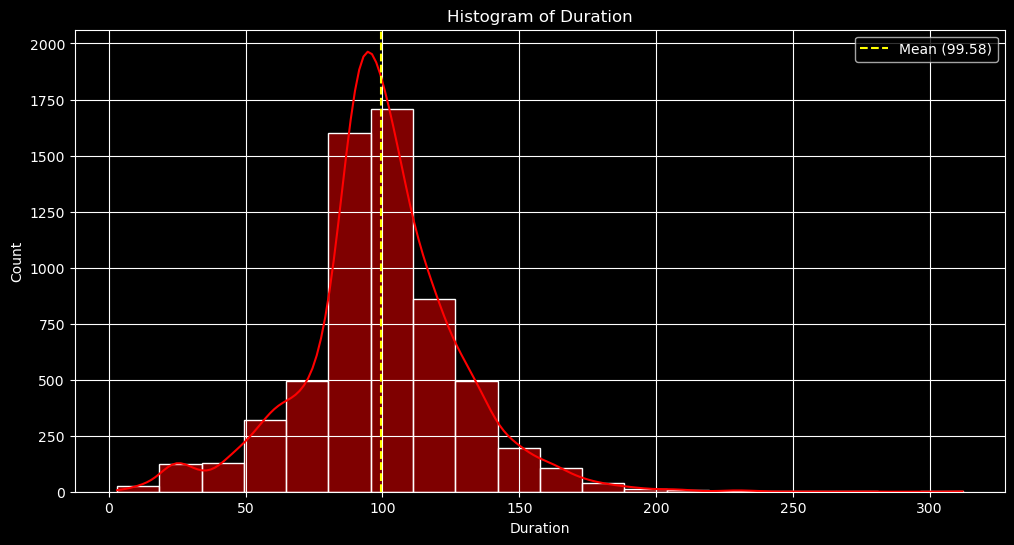

In [80]:
plt.style.use('dark_background')

plt.figure(figsize=(12,6))
sns.histplot(data=movie_durations,bins=20,kde=True, color='red')
plt.axvline(mean_duration, linestyle='--',color='yellow',label=f'Mean ({mean_duration:.2f})')
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.legend()
plt.grid(True)
plt.show()

##### **Observations**:
---
>1. The average movie length is around 100 minutes.
>2. And median is 98 minutes.
>3. As we can see this from median and mean values, they are close to each other. We can say, around 100 min. ideal for audience.

### 10. What about TV Shows? Which season more on demand?

In [83]:
tv_durations = df[(df['type'] == 'TV Show') & (df['duration'] != 'missing')]['duration']
total_tv_durations= tv_durations.value_counts()

In [84]:
top_5 = total_tv_durations.head(5)

# Making a 1d array to collect rest of tag names
more_than_5 = pd.Series({'Others': total_tv_durations[5:].sum()})

# Combine into one series
final_counts = pd.concat([top_5, more_than_5])
final_counts

1 Season     1793
2 Seasons     425
3 Seasons     199
4 Seasons      95
5 Seasons      65
Others         99
dtype: int64

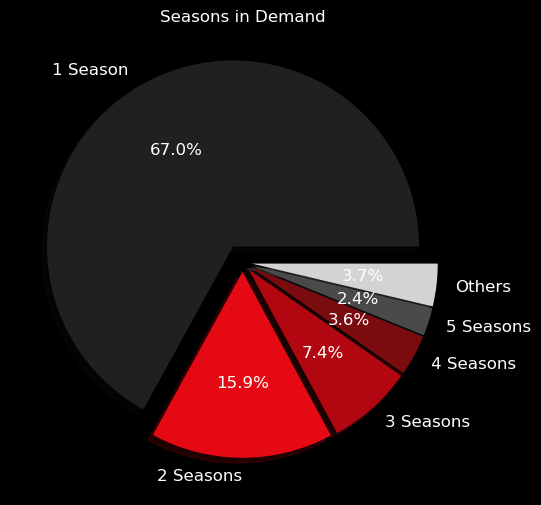

In [85]:
colors = [
    '#221f1f',  # Netflix dark
    '#e50914',  # Netflix red
    
    '#b20710',  # dark red
    '#7A0C10',  # deep blood red
    '#4A4A4A',  # greyish black
    '#D3D3D3'   # accent red-pink
]

explode = (0.1, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.figure(figsize=(6, 8))
plt.pie( final_counts, labels = ['1 Season', '2 Seasons', '3 Seasons','4 Seasons','5 Seasons','Others'],
        autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, textprops={'fontsize': 12})

plt.title("Seasons in Demand")
plt.show()

##### **Observations**:
---
>1. 67% of tv shows are 1 season, short and sweet.
>2. 2 seasons tv shows are 15.9% and 3 seasons tv shows are 7.4% and keeps decreasing. 

### 11. Word Cloud From Descriptions:

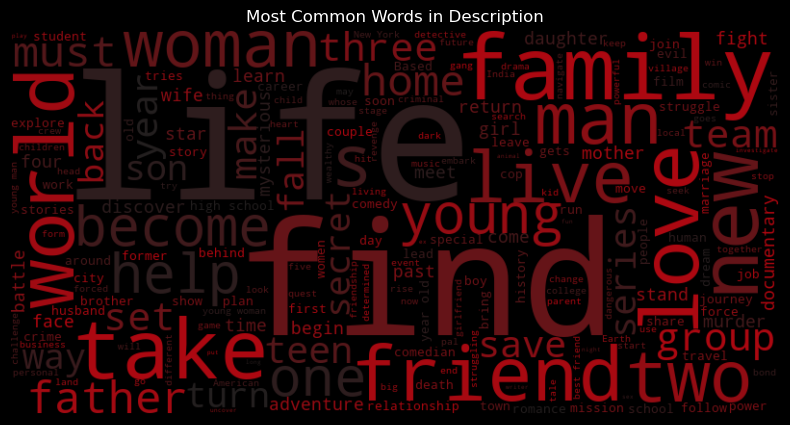

In [88]:
cmap = LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

description=df['description']
text = " ".join(description)
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap=cmap).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Description")
plt.show()

#### **Observation**: What the Netflix Word Cloud Tells Us

---
>1. **Stories Rooted in Real Emotions**: Words like 'life', 'family', 'friend', and 'love' pop out instantly — showing that Netflix often tells stories that are grounded in human connection and everyday emotions that viewers can relate to.

>2. **It’s All About Relationships**: Netflix stories often focus on people and their connections — whether it’s close friendships, family ups and downs, or romantic love. These relationships make the stories more emotional and relatable.

>3. **A Taste for Adventure**: Words like world, new, adventure, and live show that many shows take viewers on exciting journeys — to new places, different lives, and unique experiences.

>4. **Everyone’s Invited**: The mix of teen, girl, woman, and man shows that there’s something for everyone, regardless of age or gender. It’s a platform that tries to speak to a wide audience.

>5. **Drama, Secrets, and Struggles**: Words like fight, secret, team, and help point to storylines full of twists, teamwork, and characters overcoming problems — keeping things interesting and dramatic.


**Conclusion**: The word cloud reveals that Netflix’s content strategy focuses heavily on emotional storytelling, personal relationships, and adventurous experiences. With a wide range of themes and characters, the platform successfully caters to a diverse global audience by offering something for everyone — from heartfelt dramas to action-packed adventures. This balance of relatability and variety is likely a key reason for Netflix’s widespread popularity